# 1. Importando Bibliotecas e Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import warnings

In [ ]:
# Configurações de visualização
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/case1_saude_reinternacao.csv')

In [ ]:
data

,Paciente_ID,Idade,Doença Crônica,Número de consultas nos últimos 6 meses,Dias de internação na última hospitalização,Uso de medicação contínua,Reinternação em até 30 dias
0,P00001,69,Hipertensão,1,2,Sim,Sim
1,P00002,32,Diabetes,3,3,Sim,Não
2,P00003,89,Hipertensão,3,7,Sim,Não
3,P00004,78,Insuficiência Cardíaca,4,2,Sim,Não
4,P00005,38,Diabetes,3,5,Sim,Não
...,...,...,...,...,...,...,...
2495,P02496,33,Diabetes,4,1,Sim,Não
2496,P02497,51,Hipertensão,3,3,Sim,Não
2497,P02498,83,Hipertensão,3,4,Não,Sim
2498,P02499,57,Insuficiência Cardíaca,1,5,Sim,Não


## 1.1 Pré-Processamento dos dados

In [ ]:
# Renomear colunas para facilitar o acesso e a manipulação
df = data.copy()
df.columns = [
    'Paciente_ID', 'Idade', 'Doenca_Cronica', 'Consultas_6_meses',
    'Dias_internacao', 'Uso_medicacao_continua', 'Reinternacao_30_dias'
]

# Transformar colunas binárias Sim/Não em 0/1
df['Uso_medicacao_continua'] = df['Uso_medicacao_continua'].map({'Sim': 1, 'Não': 0})
df['Reinternacao_30_dias']   = df['Reinternacao_30_dias'].map({'Sim': 1, 'Não': 0})

display(df)

,Paciente_ID,Idade,Doenca_Cronica,Consultas_6_meses,Dias_internacao,Uso_medicacao_continua,Reinternacao_30_dias
0,P00001,69,Hipertensão,1,2,1,1
1,P00002,32,Diabetes,3,3,1,0
2,P00003,89,Hipertensão,3,7,1,0
3,P00004,78,Insuficiência Cardíaca,4,2,1,0
4,P00005,38,Diabetes,3,5,1,0
...,...,...,...,...,...,...,...
2495,P02496,33,Diabetes,4,1,1,0
2496,P02497,51,Hipertensão,3,3,1,0
2497,P02498,83,Hipertensão,3,4,0,1
2498,P02499,57,Insuficiência Cardíaca,1,5,1,0


In [ ]:
print("\nInformações gerais do dataset:")
df.info()
print("\n--------------------------------------------------\n")
print("Valores nulos por coluna:")
display(df.isnull().sum())
print("\n--------------------------------------------------\n")
print("\nEstatísticas descritivas das variáveis numéricas:")
display(df.describe())


Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Paciente_ID             2500 non-null   object
 1   Idade                   2500 non-null   int64 
 2   Doenca_Cronica          2500 non-null   object
 3   Consultas_6_meses       2500 non-null   int64 
 4   Dias_internacao         2500 non-null   int64 
 5   Uso_medicacao_continua  2500 non-null   int64 
 6   Reinternacao_30_dias    2500 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 136.8+ KB

--------------------------------------------------

Valores nulos por coluna:


,0
Paciente_ID,0
Idade,0
Doenca_Cronica,0
Consultas_6_meses,0
Dias_internacao,0
Uso_medicacao_continua,0
Reinternacao_30_dias,0



--------------------------------------------------


Estatísticas descritivas das variáveis numéricas:


,Idade,Consultas_6_meses,Dias_internacao,Uso_medicacao_continua,Reinternacao_30_dias
count,2500.00,2500.00,2500.00,2500.00,2500.00
mean,53.00,3.00,4.01,0.74,0.31
std,21.07,1.72,2.01,0.44,0.46
min,18.00,0.00,0.00,0.00,0.00
25%,35.00,2.00,3.00,0.00,0.00
50%,52.00,3.00,4.00,1.00,0.00
75%,71.00,4.00,5.00,1.00,1.00
max,90.00,11.00,12.00,1.00,1.00


# 2. Análise Exploratória

[]

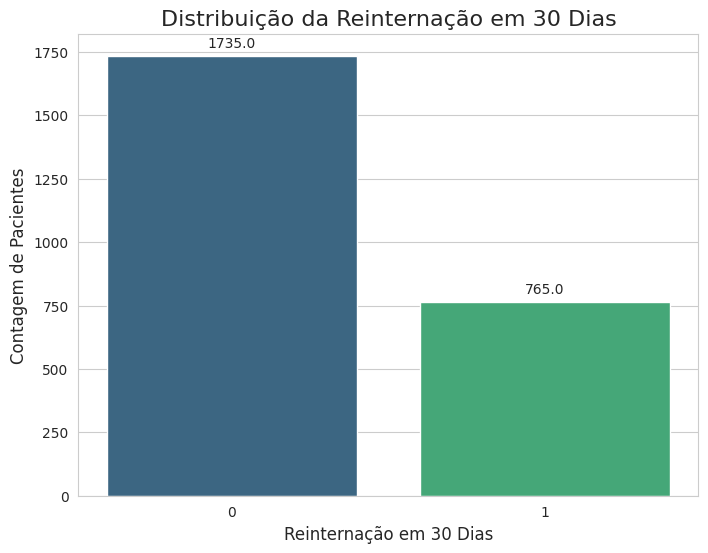

In [ ]:
# Observando o número de reinternações
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Reinternacao_30_dias', data=df, palette='viridis', order=df['Reinternacao_30_dias'].value_counts().index)
ax.set_title('Distribuição da Reinternação em 30 Dias', fontsize=16)
ax.set_xlabel('Reinternação em 30 Dias', fontsize=12)
ax.set_ylabel('Contagem de Pacientes', fontsize=12)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.plot()

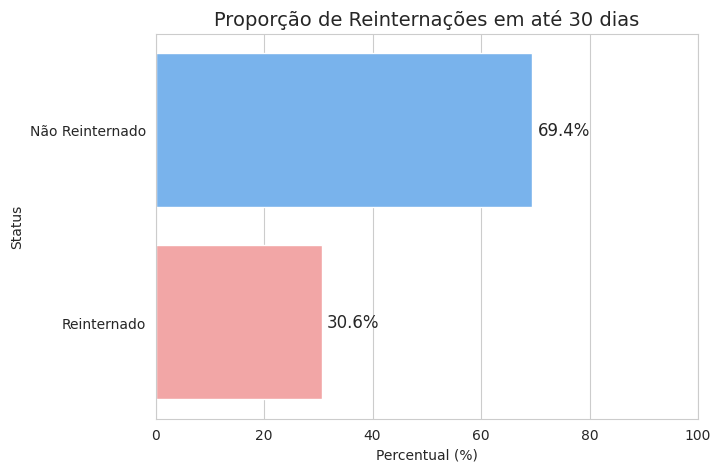

In [ ]:
# Frequência normalizada (proporção)
reint_freq = df['Reinternacao_30_dias'].value_counts(normalize=True)

# Renomeando índices para ficar legível
reint_freq.index = ['Não Reinternado' if i == 0 else 'Reinternado' for i in reint_freq.index]

plt.figure(figsize=(7,5))
sns.barplot(x=reint_freq.values*100, y=reint_freq.index, palette=['#66b3ff', '#ff9999'])

# Adicionando rótulos de porcentagem nas barras
for i, v in enumerate(reint_freq.values*100):
    plt.text(v + 1, i, f"{v:.1f}%", va='center', fontsize=12)

plt.title("Proporção de Reinternações em até 30 dias", fontsize=14)
plt.xlabel("Percentual (%)")
plt.ylabel("Status")
plt.xlim(0, 100)
plt.show()

## 2.1 Analisando Idade

[]

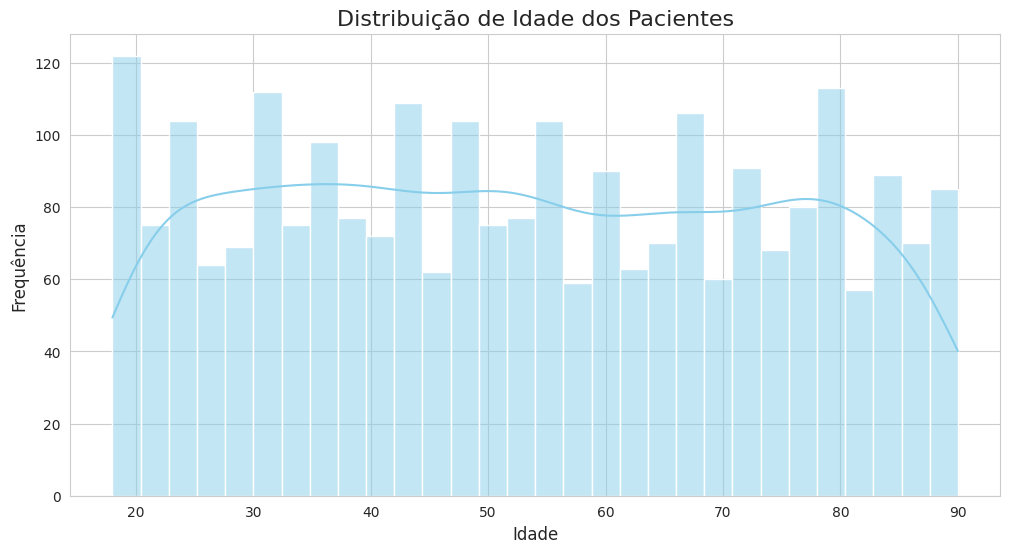

In [ ]:
# Observando a idade dos pacientes
plt.figure(figsize=(12, 6))
sns.histplot(df['Idade'], kde=True, bins=30, color='skyblue')
plt.title('Distribuição de Idade dos Pacientes', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.plot()

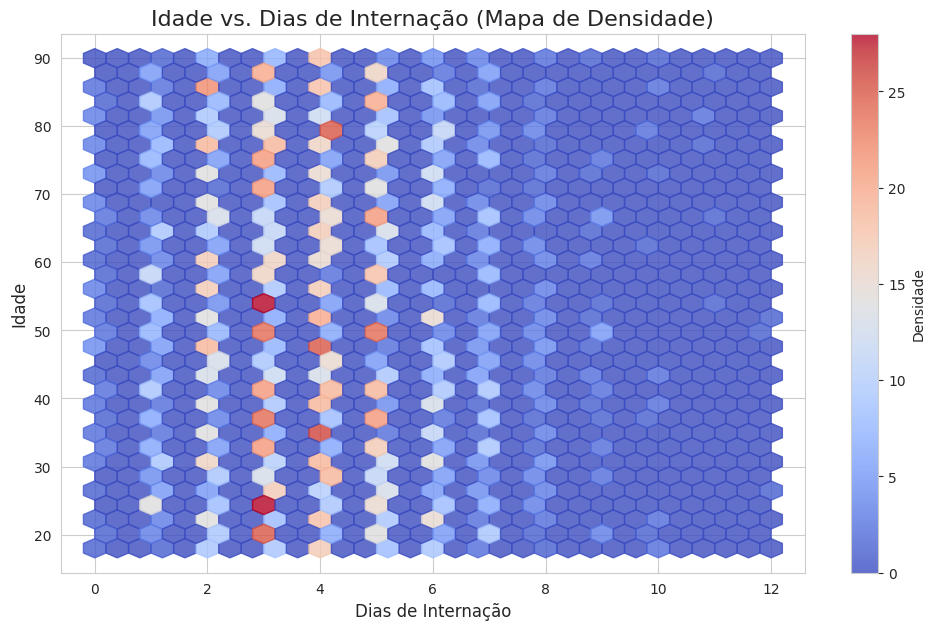

In [ ]:
plt.figure(figsize=(12, 7))
plt.hexbin(df['Dias_internacao'], df['Idade'], gridsize=30, cmap="coolwarm", alpha=0.8)
plt.colorbar(label="Densidade")
plt.title("Idade vs. Dias de Internação (Mapa de Densidade)", fontsize=16)
plt.xlabel("Dias de Internação", fontsize=12)
plt.ylabel("Idade", fontsize=12)
plt.show()

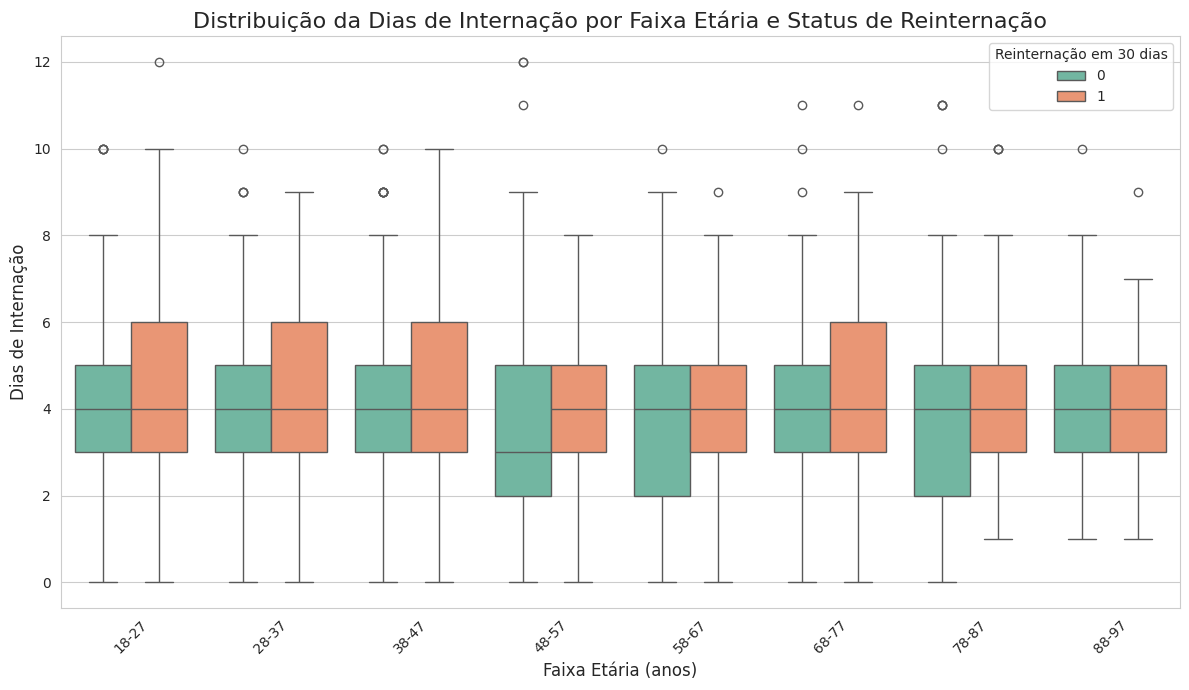

In [ ]:
# Criar faixas etárias de 10 em 10 anos
bins = list(range(18, 101, 10))  # 18 até 90+, de 10 em 10
labels = [f"{i}-{i+9}" for i in bins[:-1]]

df['Faixa_Idade'] = pd.cut(df['Idade'], bins=bins, labels=labels, right=False)

# Boxplot da Idade por Reinternação
plt.figure(figsize=(12, 7))
sns.boxplot(x='Faixa_Idade', y='Dias_internacao', hue='Reinternacao_30_dias',
            data=df, palette='Set2')

plt.title('Distribuição da Dias de Internação por Faixa Etária e Status de Reinternação', fontsize=16)
plt.xlabel('Faixa Etária (anos)', fontsize=12)
plt.ylabel('Dias de Internação', fontsize=12)
plt.legend(title='Reinternação em 30 dias')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df = df.drop('Faixa_Idade', axis=1)

## 2.2 Analisando Doenças Crônicas

[]

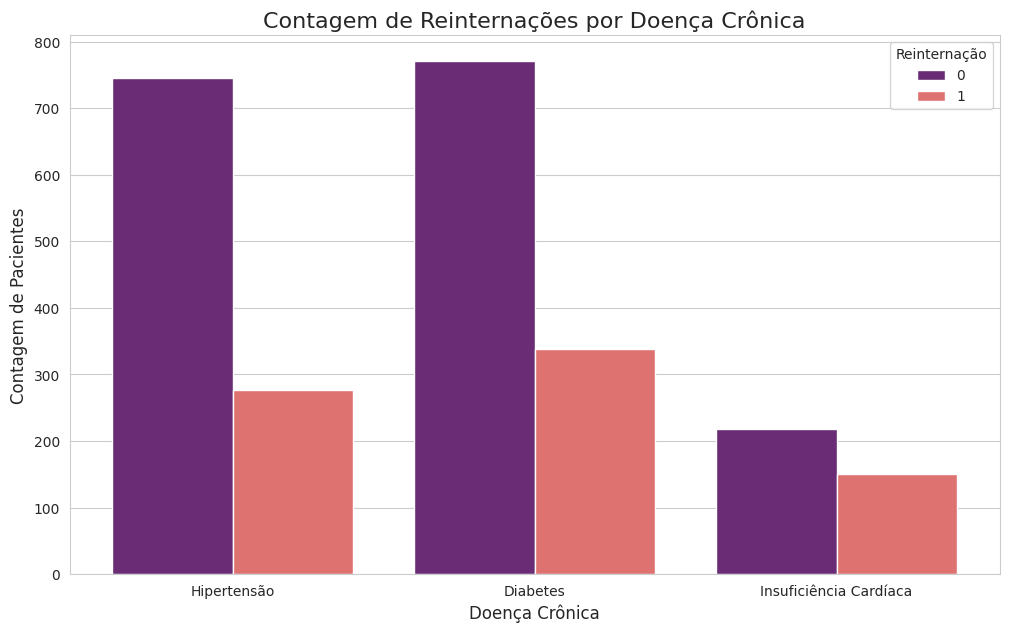

In [ ]:
# Relação entre Doença Crônica e Reinternação
plt.figure(figsize=(12, 7))
sns.countplot(x='Doenca_Cronica', hue='Reinternacao_30_dias', data=df, palette='magma')
plt.title('Contagem de Reinternações por Doença Crônica', fontsize=16)
plt.xlabel('Doença Crônica', fontsize=12)
plt.ylabel('Contagem de Pacientes', fontsize=12)
plt.legend(title='Reinternação')

plt.plot()

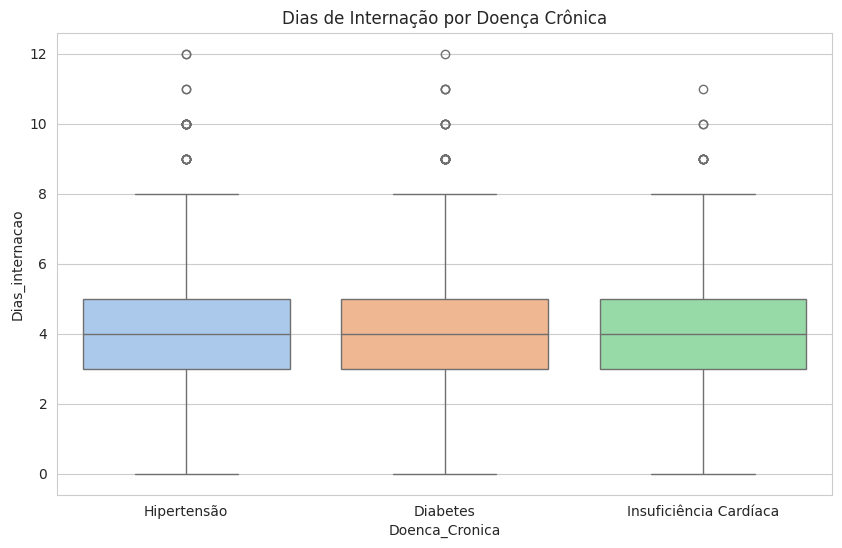


Taxa de Reinternação por Doença Crônica:


,Reinternacao_30_dias
Doenca_Cronica,
Diabetes,0.31
Hipertensão,0.27
Insuficiência Cardíaca,0.41


In [ ]:
# Dias de internação por doença crônica
plt.figure(figsize=(10,6))
sns.boxplot(x='Doenca_Cronica', y='Dias_internacao', data=df, palette='pastel')
plt.title("Dias de Internação por Doença Crônica")
plt.show()

# Taxa de reinternação por doença crônica
print("\nTaxa de Reinternação por Doença Crônica:")
display(df.groupby('Doenca_Cronica')['Reinternacao_30_dias'].mean())

## 2.3 Analisando Consultas e Dias de Internação

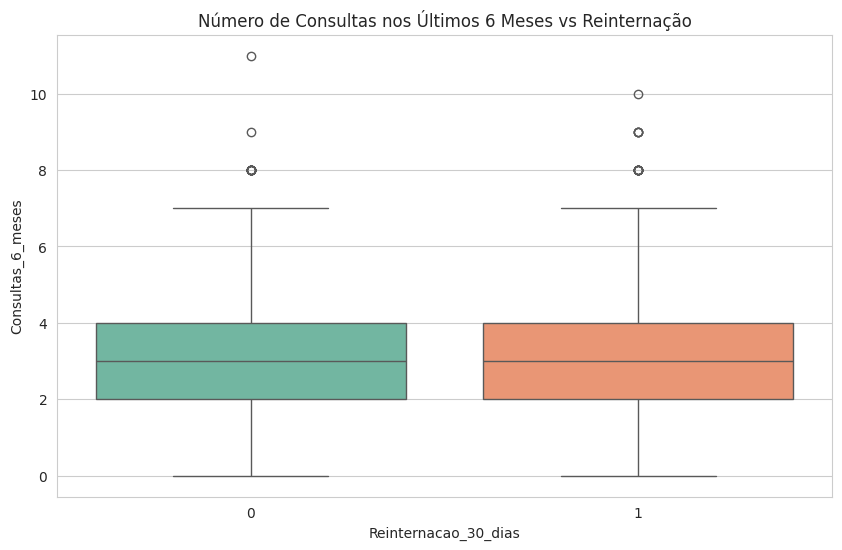

In [ ]:
# Consultas vs reinternação
plt.figure(figsize=(10,6))
sns.boxplot(x='Reinternacao_30_dias', y='Consultas_6_meses', data=df, palette='Set2')
plt.title("Número de Consultas nos Últimos 6 Meses vs Reinternação")
plt.show()

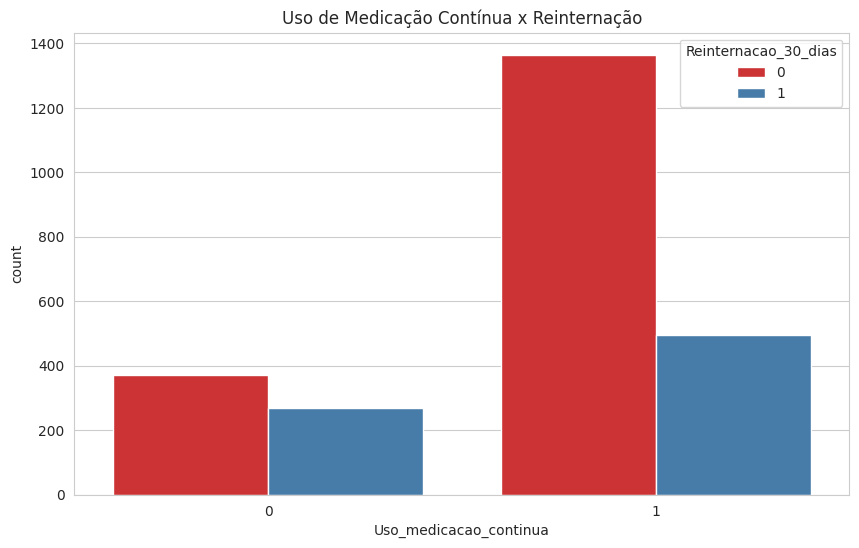

In [ ]:
sns.countplot(x='Uso_medicacao_continua', hue='Reinternacao_30_dias', data=df, palette='Set1')
plt.title("Uso de Medicação Contínua x Reinternação")
plt.show()

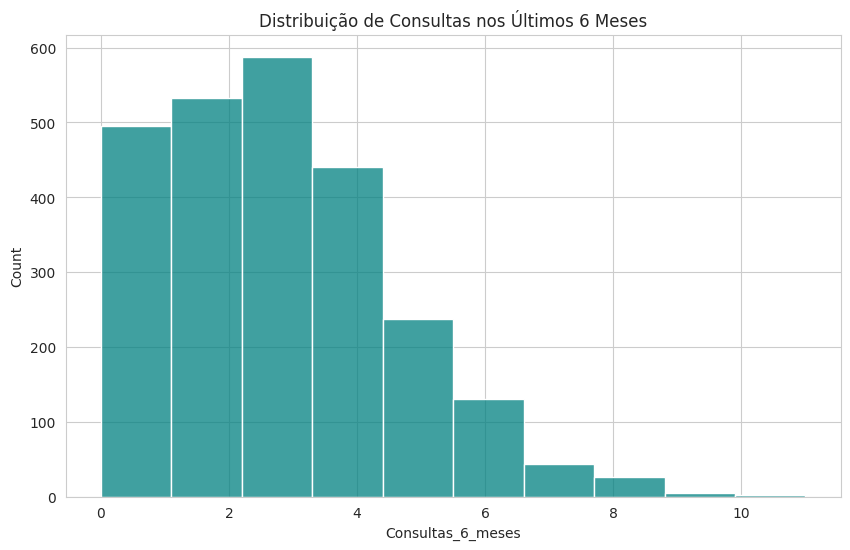

In [ ]:
sns.histplot(df['Consultas_6_meses'], bins=10, kde=False, color='teal')
plt.title("Distribuição de Consultas nos Últimos 6 Meses")
plt.show()

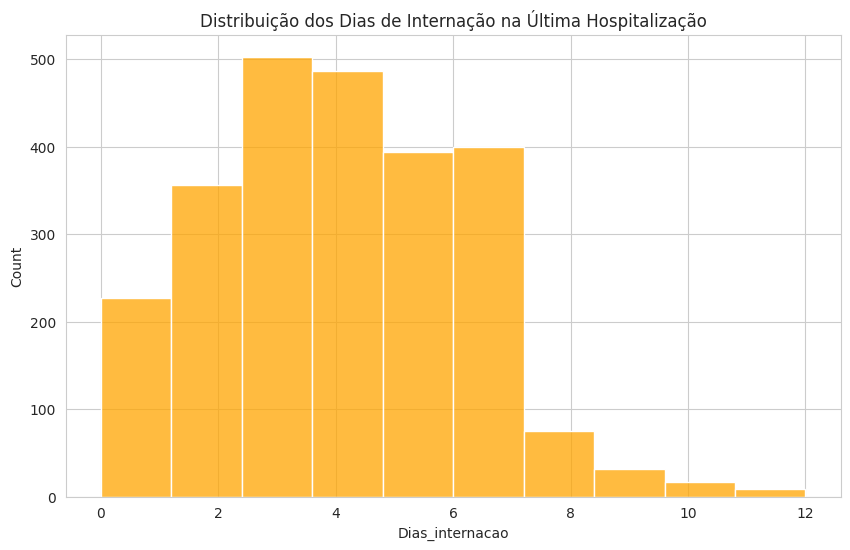

In [ ]:
sns.histplot(df['Dias_internacao'], bins=10, kde=False, color='orange')
plt.title("Distribuição dos Dias de Internação na Última Hospitalização")
plt.show()

## 2.4 Analisando Melhor Modelo

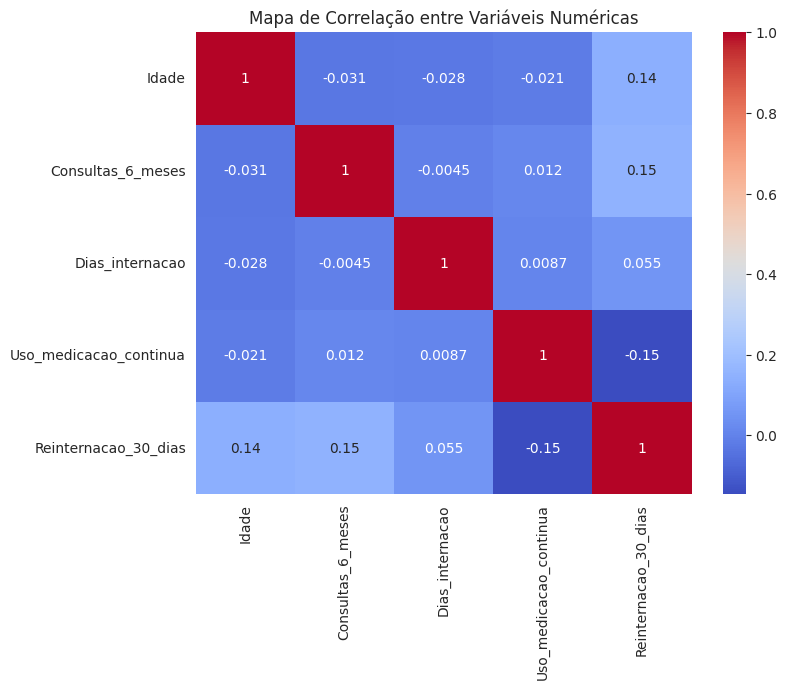

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Mapa de Correlação entre Variáveis Numéricas")
plt.show()

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['Paciente_ID', 'Reinternacao_30_dias', 'Doenca_Cronica'], axis=1)
y = df['Reinternacao_30_dias']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

Tamanho do conjunto de treino: 1750 amostras
Tamanho do conjunto de teste: 750 amostras


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)

print("Resultados do LazyPredict (Top 10 modelos):")
display(models.head(10))

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 536, number of negative: 1214
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 103
[LightGBM] [Info] Number of data points in the train set: 1750, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.306286 -> initscore=-0.817542
[LightGBM] [Info] Start training from score -0.817542
Resultados do LazyPredict (Top 10 modelos):


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.63,0.62,0.62,0.65,0.02
LabelSpreading,0.65,0.55,0.55,0.63,0.49
QuadraticDiscriminantAnalysis,0.69,0.55,0.55,0.64,0.05
GaussianNB,0.69,0.55,0.55,0.64,0.05
LabelPropagation,0.64,0.55,0.55,0.63,0.38
LinearDiscriminantAnalysis,0.70,0.54,0.54,0.63,0.07
CalibratedClassifierCV,0.71,0.54,0.54,0.63,0.26
AdaBoostClassifier,0.70,0.54,0.54,0.63,0.19
LogisticRegression,0.70,0.54,0.54,0.63,0.04


# 3. Trabalhando com Séries Temporais para Predição

In [ ]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

In [ ]:
df_pro = df.copy()

# Gerando datas
num_registros = len(df_pro)
start_date = pd.to_datetime("2023-01-01")
end_date = start_date + pd.to_timedelta(730, unit='D')

# Uniformizando
df_pro['Data_Admissao'] = pd.to_datetime(np.linspace(start_date.value, end_date.value, num_registros))
df_pro = df_pro.sort_values('Data_Admissao')

df_pro['Data_Alta'] = df_pro['Data_Admissao'] + pd.to_timedelta(df_pro['Dias_internacao'], unit='D')

reinternados_idx = df_pro[df_pro['Reinternacao_30_dias'] == 1].index
dias_para_reinternar = np.random.randint(1, 31, size=len(reinternados_idx))
df_pro.loc[reinternados_idx, 'Data_Reinternacao'] = df_pro.loc[reinternados_idx, 'Data_Alta'] + pd.to_timedelta(dias_para_reinternar, unit='D')

display(df_pro)

,Paciente_ID,Idade,Doenca_Cronica,Consultas_6_meses,Dias_internacao,Uso_medicacao_continua,Reinternacao_30_dias,Data_Admissao,Data_Alta,Data_Reinternacao
0,P00001,69,Hipertensão,1,2,1,1,2023-01-01 00:00:00.000000000,2023-01-03 00:00:00.000000000,2023-01-18 00:00:00.000000000
1,P00002,32,Diabetes,3,3,1,0,2023-01-01 07:00:38.895558144,2023-01-04 07:00:38.895558144,NaT
2,P00003,89,Hipertensão,3,7,1,0,2023-01-01 14:01:17.791116544,2023-01-08 14:01:17.791116544,NaT
3,P00004,78,Insuficiência Cardíaca,4,2,1,0,2023-01-01 21:01:56.686674688,2023-01-03 21:01:56.686674688,NaT
4,P00005,38,Diabetes,3,5,1,0,2023-01-02 04:02:35.582232832,2023-01-07 04:02:35.582232832,NaT
...,...,...,...,...,...,...,...,...,...,...
2495,P02496,33,Diabetes,4,1,1,0,2024-12-29 19:57:24.417767168,2024-12-30 19:57:24.417767168,NaT
2496,P02497,51,Hipertensão,3,3,1,0,2024-12-30 02:58:03.313325312,2025-01-02 02:58:03.313325312,NaT
2497,P02498,83,Hipertensão,3,4,0,1,2024-12-30 09:58:42.208883456,2025-01-03 09:58:42.208883456,2025-01-07 09:58:42.208883456
2498,P02499,57,Insuficiência Cardíaca,1,5,1,0,2024-12-30 16:59:21.104441856,2025-01-04 16:59:21.104441856,NaT


In [ ]:
# Contruindo série temporal
df_reinternacoes = df_pro.dropna(subset=['Data_Reinternacao'])
ts_data = df_reinternacoes.set_index('Data_Reinternacao').resample('D').size().rename('Num_Reinternacoes')
ts_data = ts_data.asfreq('D', fill_value=0)

display(df_reinternacoes)

,Paciente_ID,Idade,Doenca_Cronica,Consultas_6_meses,Dias_internacao,Uso_medicacao_continua,Reinternacao_30_dias,Data_Admissao,Data_Alta,Data_Reinternacao
0,P00001,69,Hipertensão,1,2,1,1,2023-01-01 00:00:00.000000000,2023-01-03 00:00:00.000000000,2023-01-18 00:00:00.000000000
9,P00010,19,Diabetes,6,4,0,1,2023-01-03 15:05:50.060024064,2023-01-07 15:05:50.060024064,2023-01-28 15:05:50.060024064
17,P00018,75,Diabetes,5,5,0,1,2023-01-05 23:11:01.224489728,2023-01-10 23:11:01.224489728,2023-02-05 23:11:01.224489728
18,P00019,39,Insuficiência Cardíaca,2,4,1,1,2023-01-06 06:11:40.120048128,2023-01-10 06:11:40.120048128,2023-02-08 06:11:40.120048128
19,P00020,66,Hipertensão,2,5,0,1,2023-01-06 13:12:19.015606272,2023-01-11 13:12:19.015606272,2023-01-17 13:12:19.015606272
...,...,...,...,...,...,...,...,...,...,...
2478,P02479,52,Diabetes,2,5,1,1,2024-12-24 20:46:23.193277440,2024-12-29 20:46:23.193277440,2025-01-12 20:46:23.193277440
2480,P02481,51,Insuficiência Cardíaca,3,5,1,1,2024-12-25 10:47:40.984393728,2024-12-30 10:47:40.984393728,2025-01-15 10:47:40.984393728
2492,P02493,32,Insuficiência Cardíaca,3,4,1,1,2024-12-28 22:55:27.731092480,2025-01-01 22:55:27.731092480,2025-01-04 22:55:27.731092480
2494,P02495,50,Insuficiência Cardíaca,3,2,1,1,2024-12-29 12:56:45.522208768,2024-12-31 12:56:45.522208768,2025-01-30 12:56:45.522208768


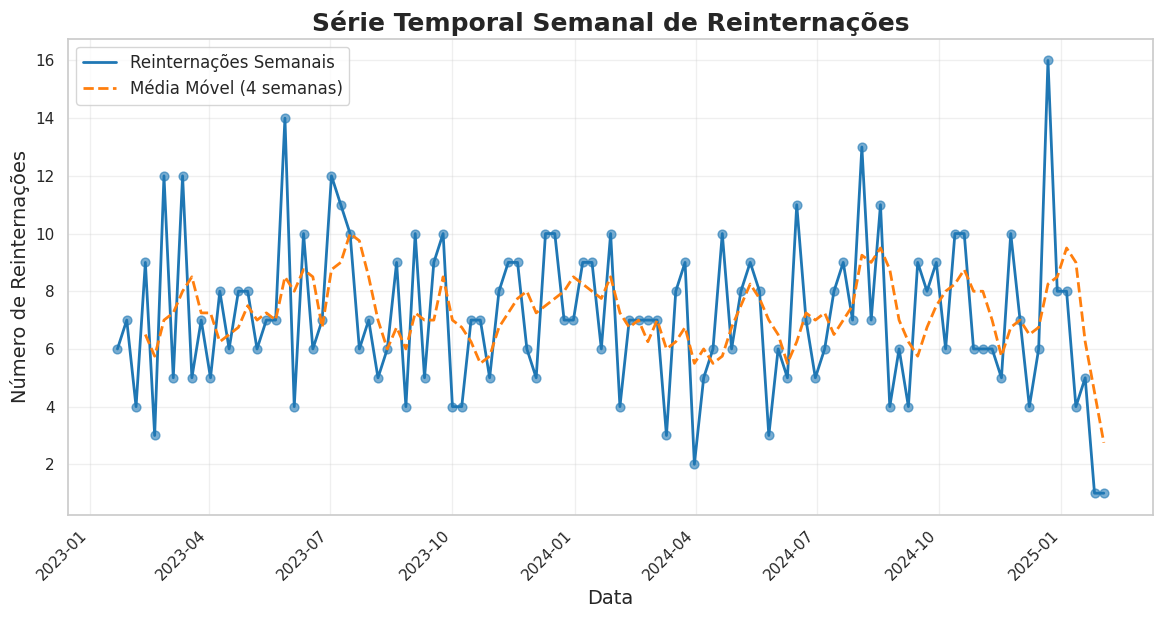

In [ ]:
# Visualizando série semanal + média móvel
ts_weekly = ts_data.resample('W').sum()

sns.set(style="whitegrid", palette="pastel", rc={"figure.figsize":(14,7)})
fig, ax = plt.subplots()
ax.plot(ts_weekly.index, ts_weekly.values, label="Reinternações Semanais", color="#1f77b4", linewidth=2)
rolling_mean = ts_weekly.rolling(window=4).mean()
ax.plot(rolling_mean.index, rolling_mean, label="Média Móvel (4 semanas)", color="#ff7f0e", linewidth=2, linestyle="--")

ax.scatter(ts_weekly.index, ts_weekly.values, color="#1f77b4", s=40, alpha=0.6)
ax.set_title("Série Temporal Semanal de Reinternações", fontsize=18, weight='bold')
ax.set_xlabel("Data", fontsize=14)
ax.set_ylabel("Número de Reinternações", fontsize=14)
fig.autofmt_xdate(rotation=45)
ax.legend(fontsize=12)
ax.grid(alpha=0.3)

plt.show()

In [ ]:
df_xgb = ts_data.to_frame().copy()
# lags
df_xgb['lag_1'] = df_xgb['Num_Reinternacoes'].shift(1)
df_xgb['lag_7'] = df_xgb['Num_Reinternacoes'].shift(7)
df_xgb['lag_14'] = df_xgb['Num_Reinternacoes'].shift(14)
# rolling
df_xgb['rolling_3'] = df_xgb['Num_Reinternacoes'].rolling(window=3).mean()
df_xgb['rolling_7'] = df_xgb['Num_Reinternacoes'].rolling(window=7).mean()
df_xgb['rolling_14'] = df_xgb['Num_Reinternacoes'].rolling(window=14).mean()
# calendar
df_xgb['day_of_week'] = df_xgb.index.dayofweek
df_xgb['is_weekend'] = df_xgb['day_of_week'].isin([5,6]).astype(int)
df_xgb['week_of_year'] = df_xgb.index.isocalendar().week.astype(int)
df_xgb['month'] = df_xgb.index.month

df_xgb = df_xgb.dropna()

# Features / target
feature_cols = ['lag_1','lag_7','lag_14','rolling_3','rolling_7','rolling_14','day_of_week','is_weekend','week_of_year','month']
X = df_xgb[feature_cols]
y = df_xgb['Num_Reinternacoes']df_xgb = ts_data.to_frame().copy()
# lags
df_xgb['lag_1'] = df_xgb['Num_Reinternacoes'].shift(1)
df_xgb['lag_7'] = df_xgb['Num_Reinternacoes'].shift(7)
df_xgb['lag_14'] = df_xgb['Num_Reinternacoes'].shift(14)
# rolling
df_xgb['rolling_3'] = df_xgb['Num_Reinternacoes'].rolling(window=3).mean()
df_xgb['rolling_7'] = df_xgb['Num_Reinternacoes'].rolling(window=7).mean()
df_xgb['rolling_14'] = df_xgb['Num_Reinternacoes'].rolling(window=14).mean()
# calendar
df_xgb['day_of_week'] = df_xgb.index.dayofweek
df_xgb['is_weekend'] = df_xgb['day_of_week'].isin([5,6]).astype(int)
df_xgb['week_of_year'] = df_xgb.index.isocalendar().week.astype(int)
df_xgb['month'] = df_xgb.index.month

df_xgb = df_xgb.dropna()

# Features / target
feature_cols = ['lag_1','lag_7','lag_14','rolling_3','rolling_7','rolling_14','day_of_week','is_weekend','week_of_year','month']
X = df_xgb[feature_cols]
y = df_xgb['Num_Reinternacoes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, shuffle=False)
print(f"Treino: {len(X_train)} dias, Teste: {len(X_test)} dias")

Treino: 657 dias, Teste: 74 dias


In [ ]:
model = XGBRegressor(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42
)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(X_test)

# duas avaliações: floats e inteiros (arredondados/clipeados)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE (Root Mean Squared Error): {rmse:.3f}")
print("  → Diferença média entre previsão e real, penalizando erros grandes (picos).")
print(f"MAE (Mean Absolute Error): {mae:.3f}")
print("  → Diferença absoluta média entre previsão e real, menos sensível a picos.")

RMSE (Root Mean Squared Error): 0.633
  → Diferença média entre previsão e real, penalizando erros grandes (picos).
MAE (Mean Absolute Error): 0.476
  → Diferença absoluta média entre previsão e real, menos sensível a picos.


In [ ]:
# R² (coeficiente de determinação)
r2 = r2_score(y_test, y_pred)

accuracy_within1 = (abs(y_pred - y_test) <= 1).mean()

print(f"R²: {r2:.3f}")
print(f"Acurácia tolerando ±1 reinternação: {accuracy_within1*100:.2f}%")

R²: 0.549
Acurácia tolerando ±1 reinternação: 89.19%


In [ ]:
# arredondar para counts inteiros para avaliar de modo prático
y_pred_int = np.round(y_pred).astype(int)
y_pred_int = np.clip(y_pred_int, 0, None)
rmse_int = np.sqrt(mean_squared_error(y_test, y_pred_int))
mae_int = mean_absolute_error(y_test, y_pred_int)
print(f"RMSE (rounded ints): {rmse_int:.3f}, MAE (rounded): {mae_int:.3f}")

RMSE (rounded ints): 0.658, MAE (rounded): 0.405


In [ ]:
accuracy_exact_int = (y_pred_int == y_test).mean()
accuracy_within1_int = (abs(y_pred_int - y_test) <= 1).mean()

print(f"Acurácia exata: {accuracy_exact_int*100:.2f}%")
print(f"Acurácia tolerando ±1 reinternação: {accuracy_within1_int*100:.2f}%")

Acurácia exata: 60.81%
Acurácia tolerando ±1 reinternação: 98.65%


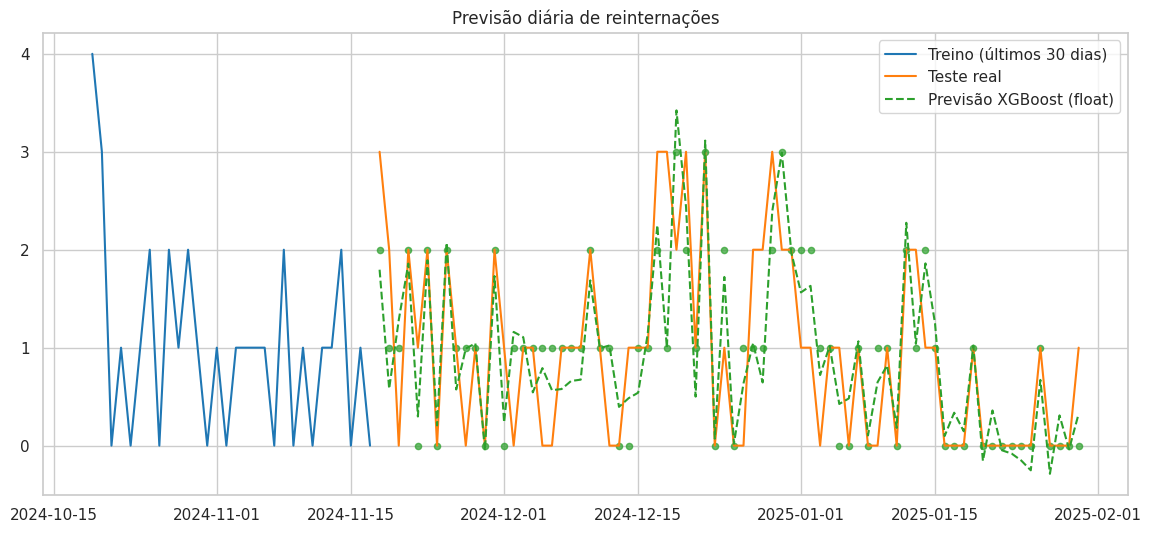

In [ ]:
lookback_days = 30
plt.figure(figsize=(14,6))
if len(y_train) > lookback_days:
    y_train_recent = y_train[-lookback_days:]
    plt.plot(y_train_recent.index, y_train_recent, label='Treino (últimos 30 dias)', color='#1f77b4')
plt.plot(y_test.index, y_test, label='Teste real', color='#ff7f0e')
plt.plot(y_test.index, y_pred, label='Previsão XGBoost (float)', color='#2ca02c', linestyle='--')
plt.scatter(y_test.index, y_pred_int, color='#2ca02c', s=20, alpha=0.7)
plt.title('Previsão diária de reinternações')
plt.legend()
plt.show()

In [ ]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_dist = {
    "n_estimators": [100, 200, 500, 1000],
    "max_depth": [2, 3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

tscv = TimeSeriesSplit(n_splits=4)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    cv=tscv,
    scoring="neg_root_mean_squared_error",
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X, y)

print("Melhores hiperparâmetros:", random_search.best_params_)
print("Melhor RMSE médio:", -random_search.best_score_)

Fitting 4 folds for each of 20 candidates, totalling 80 fits
Melhores hiperparâmetros: {'subsample': 0.6, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Melhor RMSE médio: 0.7469417452812195


RMSE final: 0.611
MAE final: 0.494
R²: 0.581
Acurácia exata: 59.46%
Acurácia tolerando ±1 reinternação: 100.00%


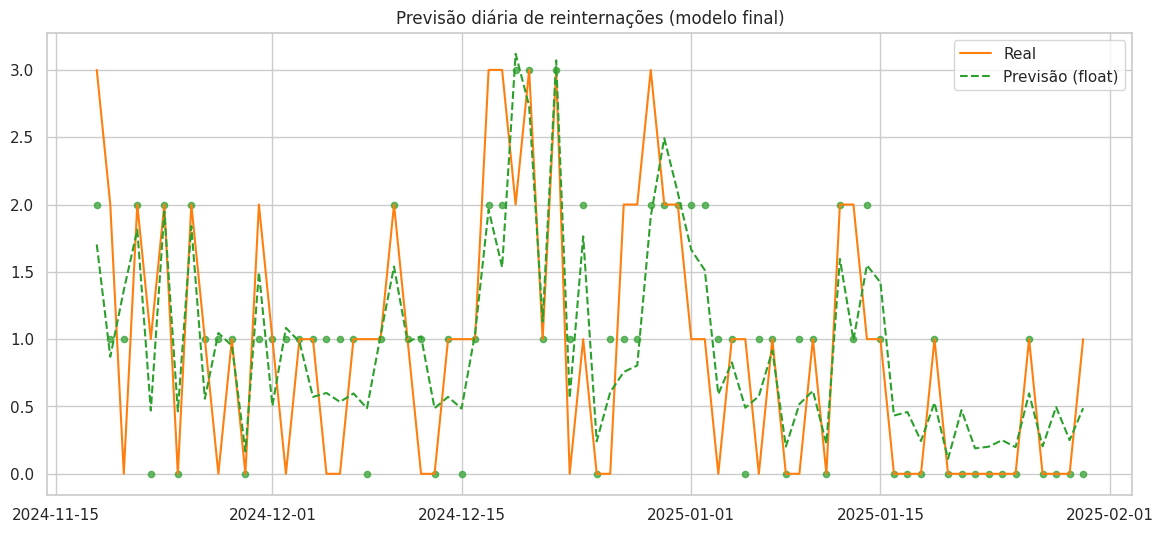

In [ ]:
# Modelo final com os melhores hiperparâmetros
best_model = XGBRegressor(
    subsample=0.6,
    n_estimators=500,
    max_depth=3,
    learning_rate=0.01,
    colsample_bytree=1.0,
    objective="reg:squarederror",
    random_state=42
)

# Treinando no conjunto de treino
best_model.fit(X_train, y_train)

# Previsão no conjunto de teste
y_pred_best = best_model.predict(X_test)

# Avaliação
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"RMSE final: {rmse_best:.3f}")
print(f"MAE final: {mae_best:.3f}")
print(f"R²: {r2_best:.3f}")

# Arredondando para contar reinternações
y_pred_int_best = np.round(y_pred_best).astype(int)
y_pred_int_best = np.clip(y_pred_int_best, 0, None)

acc_exact = (y_pred_int_best == y_test).mean() * 100
acc_tol1 = (np.abs(y_pred_int_best - y_test) <= 1).mean() * 100

print(f"Acurácia exata: {acc_exact:.2f}%")
print(f"Acurácia tolerando ±1 reinternação: {acc_tol1:.2f}%")

# Plotando
plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test, label="Real", color="#ff7f0e")
plt.plot(y_test.index, y_pred_best, label="Previsão (float)", color="#2ca02c", linestyle="--")
plt.scatter(y_test.index, y_pred_int_best, color="#2ca02c", s=20, alpha=0.7)
plt.title("Previsão diária de reinternações (modelo final)")
plt.legend()
plt.show()

In [ ]:
def forecast_next_n_days(model, ts_series, n_days=14):
    """Gera previsão iterativa n dias à frente usando o último ts_series e o modelo treinado.
       ts_series: pd.Series com índice datetime e coluna Num_Reinternacoes
    """
    last_df = ts_series.to_frame().copy()
    preds = []
    current = last_df.copy()
    for i in range(n_days):
        # construir features a partir dos últimos dias
        last_date = current.index[-1]
        new_date = last_date + pd.Timedelta(days=1)
        lag_1 = current['Num_Reinternacoes'].iloc[-1]
        lag_7 = current['Num_Reinternacoes'].iloc[-7] if len(current) >= 7 else current['Num_Reinternacoes'].iloc[-1]
        lag_14 = current['Num_Reinternacoes'].iloc[-14] if len(current) >= 14 else current['Num_Reinternacoes'].iloc[-1]
        rolling_3 = current['Num_Reinternacoes'].rolling(window=3).mean().iloc[-1]
        rolling_7 = current['Num_Reinternacoes'].rolling(window=7).mean().iloc[-1]
        rolling_14 = current['Num_Reinternacoes'].rolling(window=14).mean().iloc[-1]
        dow = new_date.dayofweek
        is_weekend = 1 if dow in [5,6] else 0
        week_of_year = new_date.isocalendar().week
        month = new_date.month

        x_new = np.array([lag_1, lag_7, lag_14, rolling_3, rolling_7, rolling_14, dow, is_weekend, week_of_year, month]).reshape(1, -1)
        y_new = model.predict(x_new)[0]
        y_new = max(0, y_new)  # não permitir negativo
        # anexar à série atual para gerar lags futuros
        current.loc[new_date] = [y_new]
        preds.append((new_date, y_new))
    return pd.Series(data=[p[1] for p in preds], index=[p[0] for p in preds], name='forecast')

future_preds = forecast_next_n_days(model, ts_data, n_days=14)
print("Previsão para os próximos 14 dias:")
print(future_preds.round(2))

Previsão para os próximos 14 dias:
2025-01-31   0.00
2025-02-01   0.45
2025-02-02   0.72
2025-02-03   0.52
2025-02-04   0.51
2025-02-05   0.82
2025-02-06   0.75
2025-02-07   1.10
2025-02-08   0.56
2025-02-09   1.34
2025-02-10   1.17
2025-02-11   1.04
2025-02-12   1.28
2025-02-13   0.80
Name: forecast, dtype: float64
